## Assignment 3: $k$ Nearest Neighbor

**Do two questions.**

`! git clone https://github.com/ds4e/knn`

In [1]:
! git clone https://github.com/KaranRawatUVA/knn

Cloning into 'knn'...
remote: Enumerating objects: 75, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 75 (delta 19), reused 13 (delta 13), pack-reused 51 (from 1)
Receiving objects: 100% (75/75), 24.82 MiB | 11.49 MiB/s, done.
Resolving deltas: 100% (26/26), done.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import os
current_directory = os.getcwd()
print(current_directory)


/content


**Q0.**
1. What is the difference between regression and classification?
2. What is a confusion table? What does it help us understand about a model's performance?
3. What does the SSE quantify about a particular model?
4. What are overfitting and underfitting?
5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?
6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

**Q1.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [4]:
# 1
df_cars = pd.read_csv('knn/data/USA_cars_datasets.csv')

df_cars = df_cars[['price', 'year', 'mileage']]

has_nan = df_cars.isna().any().any() # got from google search ai

print(has_nan) # There is non NA's to check to handle because this is false

print(df_cars.shape)
df_cars.head()


False
(2499, 3)


,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654


In [5]:
# 2.

def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)
# Apply maxmin to each column of X to get U:
df_cars[['year', 'mileage']] = df_cars[['year', 'mileage']].apply(maxmin)


df_cars.head()


,price,year,mileage
0,6300,0.744681,0.269287
1,2899,0.808511,0.187194
2,5350,0.957447,0.038892
3,25000,0.872340,0.063016
4,27700,0.957447,0.006537


In [6]:
# 3:
from sklearn.model_selection import train_test_split

y = df_cars['price']
X = df_cars.drop('price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=65) # For replication purposes

3


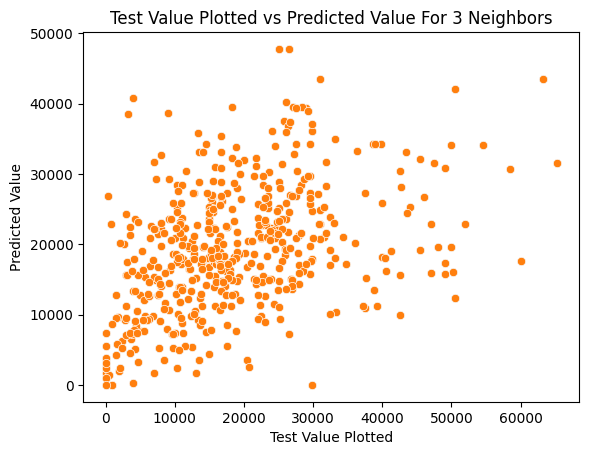

10


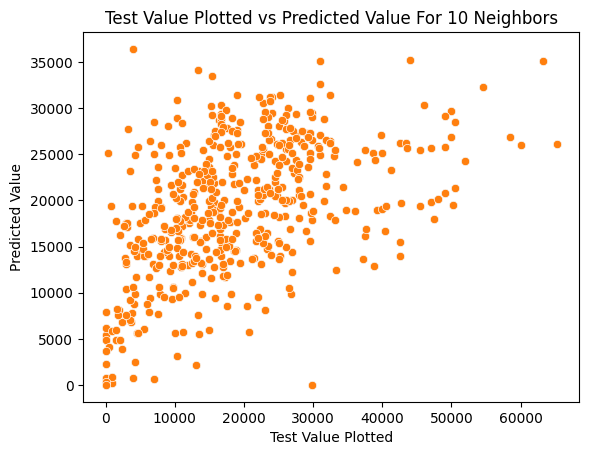

25


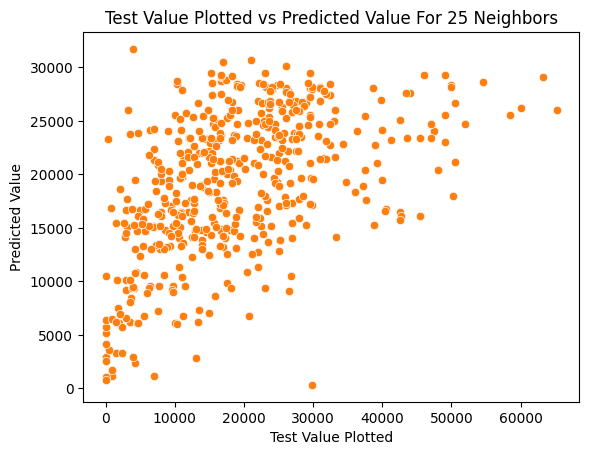

50


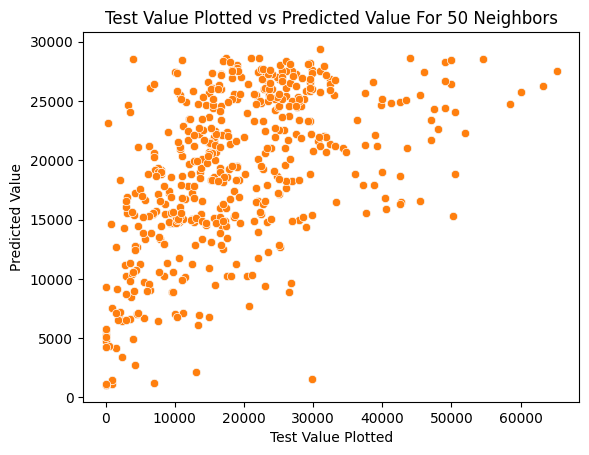

100


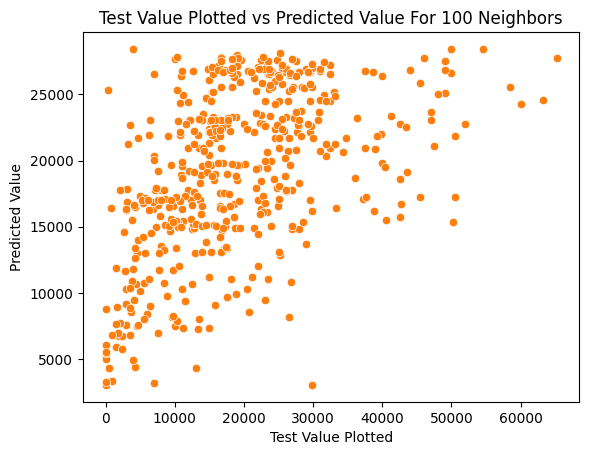

300


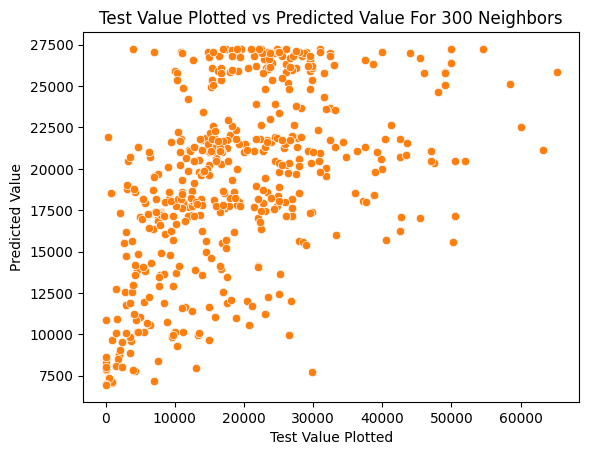

k: 3 MSE: 133487993.49644443
k: 10 MSE: 111588702.61873999
k: 25 MSE: 104962784.87012799
k: 50 MSE: 103873193.2199608
k: 100 MSE: 104534999.25921261
k: 300 MSE: 107657680.73624039


<Figure size 640x480 with 0 Axes>

In [7]:
#4
from sklearn.neighbors import KNeighborsRegressor # Import the kNN regression tool
from sklearn.metrics import mean_squared_error

k_bar= [3, 10, 25, 50, 100, 300]
MSE = [] # MSE for test set

for k in k_bar:
  print(k)
  model = KNeighborsRegressor(n_neighbors=k) # Create a sk model for k
  fitted_model = model.fit(X_train, y_train) # Train the model on our data

  y_hat_test = fitted_model.predict(X_test)
  MSE.append(mean_squared_error(y_test, y_hat_test)) # Save the computed MSE for test set
  sns.scatterplot(x=y_test, y=y_hat_test)
  #plots
  plt.title('Test Value Plotted vs Predicted Value For ' + str(k) + ' Neighbors')
  plt.xlabel('Test Value Plotted')
  plt.ylabel('Predicted Value')

  sns.scatterplot(x=y_test, y=y_hat_test)


  plt.show()
  plt.clf()  # Clear the current figure to avoid overlapping plots

for i in range(len(MSE)):
  print("k:", k_bar[i], "MSE:", MSE[i])





# 4 continued:

As K increases, the mean squared error decreases until it reaches its max low at 50. After that is starts to slightly rise again (overfitting).

# 5:

The optimal K for this data is 50 because that is when the mean squared error  is the lowest. After that is starts to slightly rise again.

# 6:

The plots for the lower k were more spread apart from its actual prices as the predicted prices were either lower or higher then then what the actual prices should have been (more spread apart). This means it was underfitting.

The plots for the higher k were more tightly compacted. However, they still have more of a mean squared error then 50. This means the higher k were overfitting.

**Q2.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on.

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?
5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

In [8]:
# 1
df_animal = pd.read_csv('knn/data/zoo.csv')
cols = df_animal.columns
df_animal.head()


,animal,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [9]:
# print the eda of each the class
max = 0
for i in cols[1:]:
  print(i)
  unique_values = df_animal[i].unique()
  print(unique_values)
  print("Amount of unique values: " + str(len(unique_values)))
  print(df_animal[i].describe())
  cross_tab = pd.crosstab(df_animal[i], df_animal['class'])
  print('cross_tab:')
  print(cross_tab)

  print('\n')
  if df_animal[i].std() > max and i != 'class':
    max = df_animal[i].std()
    name = i
print("Max STD: " + name + ", " + str(max))

hair
[1 0]
Amount of unique values: 2
count    101.000000
mean       0.425743
std        0.496921
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: hair, dtype: float64
cross_tab:
class   1   2  3   4  5  6   7
hair                          
0       2  20  5  13  4  4  10
1      39   0  0   0  0  4   0


feathers
[0 1]
Amount of unique values: 2
count    101.000000
mean       0.198020
std        0.400495
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: feathers, dtype: float64
cross_tab:
class      1   2  3   4  5  6   7
feathers                         
0         41   0  5  13  4  8  10
1          0  20  0   0  0  0   0


eggs
[0 1]
Amount of unique values: 2
count    101.000000
mean       0.584158
std        0.495325
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: eggs, dtype: float64
cross_tab:
class   1   2  3   4

# 1 continued (All the information asked for is above):

I think legs will best predict the class for a couple of reasons. It has many different unique numbers (not just 0/1). Also, it has the highest standard deviation, meaning that more of the values get used and therefore can have a relationship with class. Also, based on the cross tab, there looks like there could be a relationship as the unique values seem to have a prevalent class in most cases.


In [10]:
# 2

# (no maxmin as per instructions)

y = df_animal['class']
X = df_animal.drop(['class', 'animal'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.5, # Split the sample 50/50
                                                    random_state=65)

2


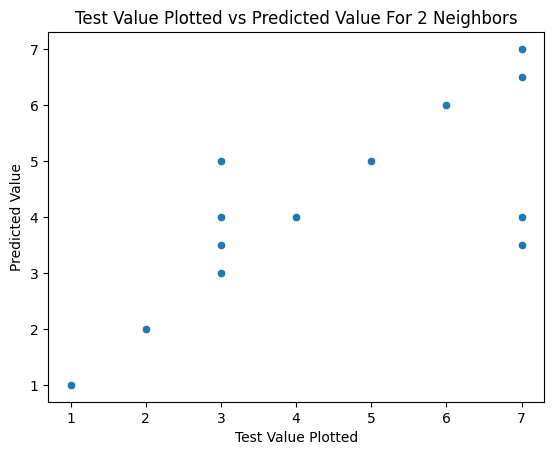

3


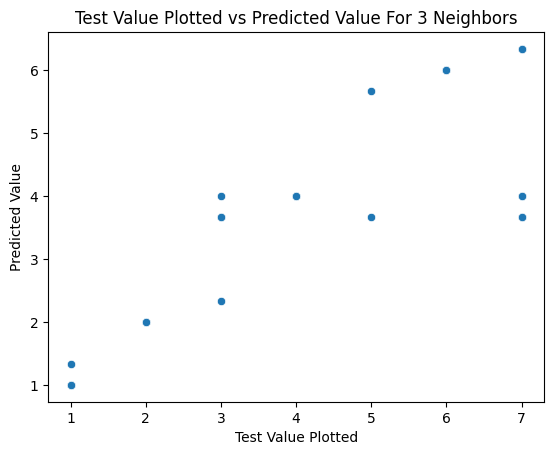

10


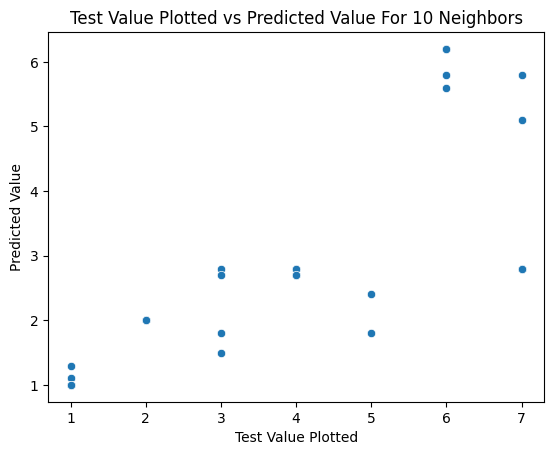

25


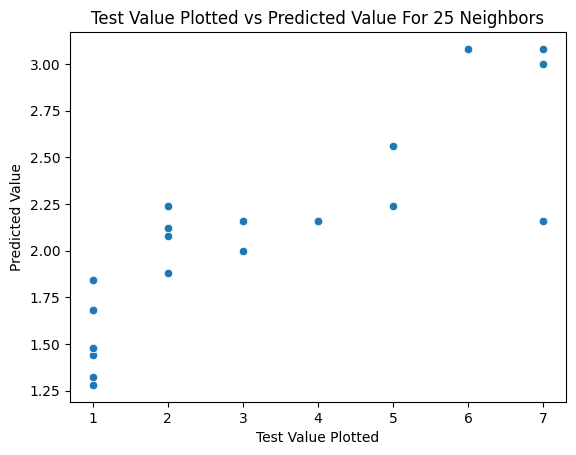

50


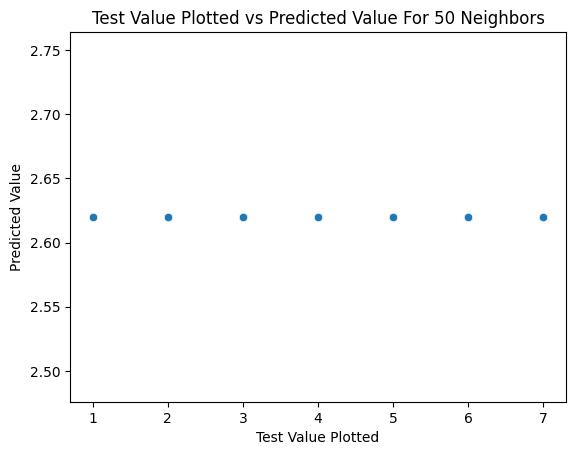

k: 2 MSE: 0.9411764705882353
k: 3 MSE: 0.8976034858387801
k: 10 MSE: 2.1486274509803924
k: 25 MSE: 4.133145098039215
k: 50 MSE: 4.723223529411766


<Figure size 640x480 with 0 Axes>

In [11]:
# 3

k_bar= [2, 3, 10, 25, 50]
MSE = [] # MSE for test set

for k in k_bar:
  print(k)
  model = KNeighborsRegressor(n_neighbors=k) # Create a sk model for k
  fitted_model = model.fit(X_train, y_train) # Train the model on our data

  y_hat_test = fitted_model.predict(X_test)
  MSE.append(mean_squared_error(y_test, y_hat_test)) # Save the computed MSE for test set
  #plots
  sns.scatterplot(x=y_test, y=y_hat_test)
  plt.title('Test Value Plotted vs Predicted Value For ' + str(k) + ' Neighbors')
  plt.xlabel('Test Value Plotted')
  plt.ylabel('Predicted Value')
  plt.show()
  plt.clf()
  #plots
for i in range(len(MSE)):
  print("k:", k_bar[i], "MSE:", MSE[i])



# 3 continued

It looks like k = 3 is the best because it has the lowest mean squared error. k = 2 is slightly higher and as k increases, so does the mean squared error. The graph is not underfitted like k = 2, or overfitted like 10-50, (especially 50).

In [12]:
# 4

k = 3
model = KNeighborsRegressor(n_neighbors=k) # Create a sk model for k
fitted_model = model.fit(X_train, y_train) # Train the model on our data

y_hat_test = fitted_model.predict(X_test)

pd.crosstab(y_test,y_hat_test)

col_0,1.000000,1.333333,2.000000,2.333333,3.666667,4.000000,5.666667,6.000000,6.333333
class,,,,,,,,,
1,18,1,0,0,0,0,0,0,0
2,0,0,8,0,0,0,0,0,0
3,0,0,0,1,2,1,0,0,0
4,0,0,0,0,0,8,0,0,0
5,0,0,0,0,1,0,1,0,0
6,0,0,0,0,0,0,0,4,0
7,0,0,0,0,2,2,0,0,2


# 4 Continued

It seems like the model has problems predicting class 7, as it doesn't exist in this model (No, 7's just 6.3). It also seems to struggle with class 5 as it gets half of them wrong. It also seems to get 3 wrong as it doesn't predict anything as 3 and it's predictions bleed into 4 and 2. Overall though, it is pretty accurate.

The mistakes are made the groups 3, 5 and 7. These are all (mostly) underwater animals, so it seems to struggle with underwater animals

In [13]:
# 5


y = df_animal['class']
X = df_animal[['milk', 'aquatic', 'airborne']]

X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.5, # Split the sample 50/50
                                                    random_state=65)

1


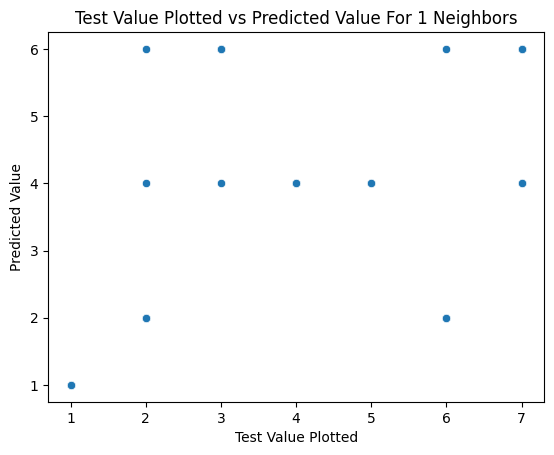

2


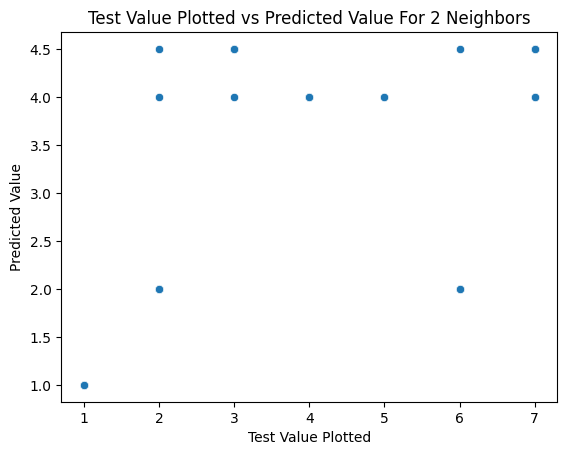

3


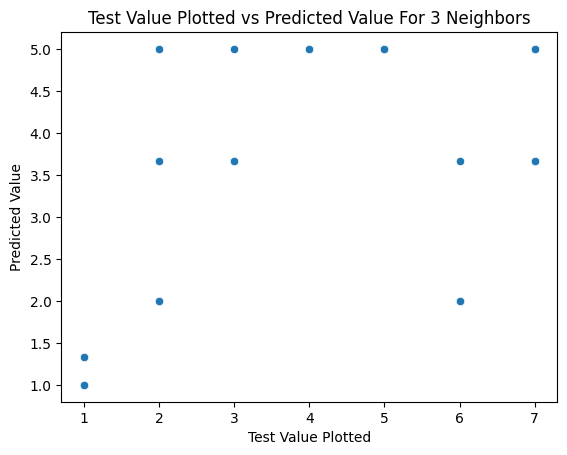

10


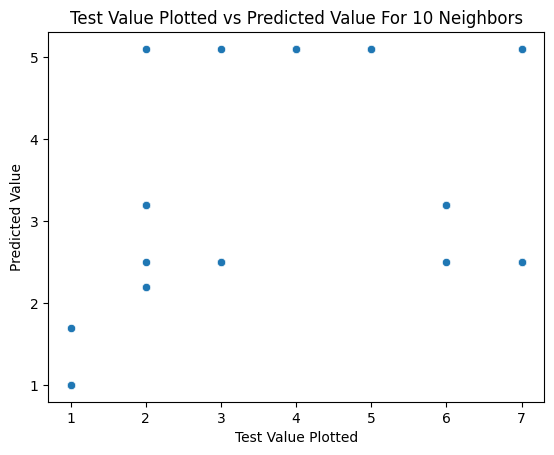

25


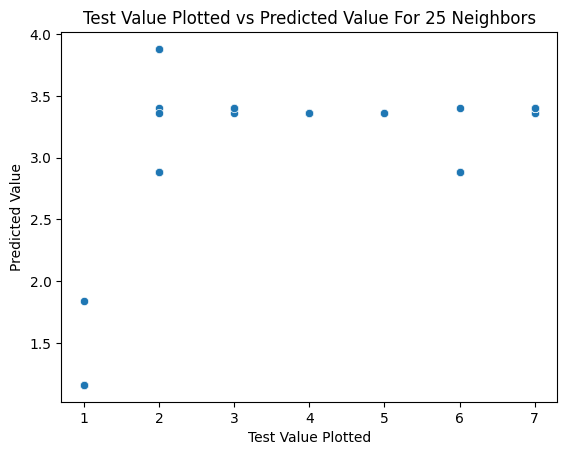

35


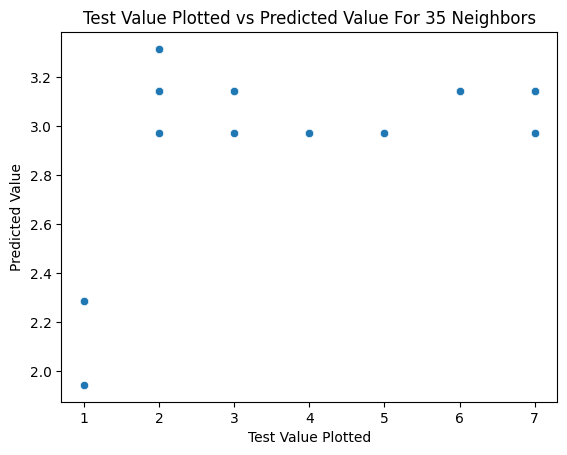

50


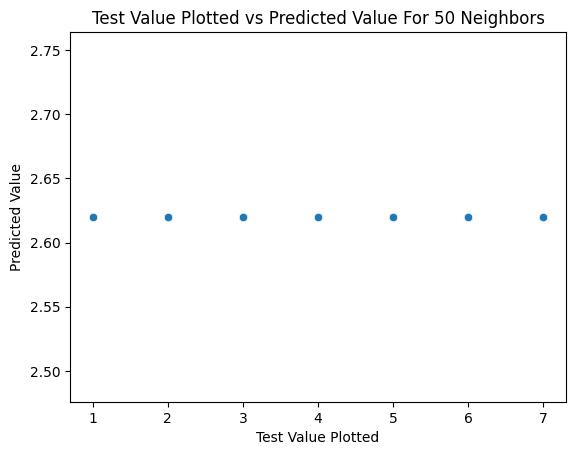

k: 1 MSE: 2.3529411764705883
k: 2 MSE: 2.2205882352941178
k: 3 MSE: 2.570806100217865
k: 10 MSE: 3.0400000000000005
k: 25 MSE: 2.7198117647058826
k: 35 MSE: 3.5872749099639853
k: 50 MSE: 4.723223529411766


<Figure size 640x480 with 0 Axes>

In [14]:
# 5 continued

k_bar= [1, 2, 3, 10, 25, 35, 50]
MSE = [] # MSE for test set

for k in k_bar:
  print(k)
  model = KNeighborsRegressor(n_neighbors=k) # Create a sk model for k
  fitted_model = model.fit(X_train, y_train) # Train the model on our data

  y_hat_test = fitted_model.predict(X_test)
  MSE.append(mean_squared_error(y_test, y_hat_test)) # Save the computed MSE for test set
  #plots
  sns.scatterplot(x=y_test, y=y_hat_test)
  plt.title('Test Value Plotted vs Predicted Value For ' + str(k) + ' Neighbors')
  plt.xlabel('Test Value Plotted')
  plt.ylabel('Predicted Value')
  plt.show()
  plt.clf()
  #plots
for i in range(len(MSE)):
  print("k:", k_bar[i], "MSE:", MSE[i])



In [30]:
# 4

k = 2
model = KNeighborsRegressor(n_neighbors=k) # Create a sk model for k
fitted_model = model.fit(X_train, y_train) # Train the model on our data

y_hat_test = fitted_model.predict(X_test)

pd.crosstab(y_test,y_hat_test)

col_0,1.0,2.0,4.0,4.5
class,,,,
1,19,0,0,0
2,0,6,1,1
3,0,0,1,3
4,0,0,8,0
5,0,0,2,0
6,0,3,0,1
7,0,0,2,4


In [32]:
from sklearn.neighbors import KNeighborsClassifier



model = KNeighborsClassifier(n_neighbors=2)

fitted_model = model.fit(X_train, y_train)

y_probs = fitted_model.predict_proba(X_train)

print(y_probs)

[[0.  1.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  1.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  1.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  1.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  1.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  1.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  1.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.5 0.  0.  0.5 0. ]
 [0.  1.

# 5 Continued

Only classes 1 through 2 and 4 through 5 (really 4.5, but rounded up is 5) are represented. So, 3, 6 and 7 are missing.

The accuracy has taken an hit overall. 1 and 4 are perfect. 2 has taken a hit accuracy wise. Then 3, 6, and 7 are terrible.

So overall this made the model worse, so those variables were important.

**Q3.** This question is a case study for $k$ nearest neighbor regression, using the `cars_env.csv` data.

The variables that go into the model are one more dimension to think about: We can use the train-test split approach to pick the variables that go into the model, not just the number of neighbors.

1. Load the data. We're going to use `footprint`, `baseline mpg`, `baseline price`, and `baseline sales`. Prepare some EDA results for these variables: describe tables, histograms/kernel density plots, scatterplots, etc. I renamed these variables to `footprint`, `mpg`, `price`, and `sales` to save time.
2. Maxmin normalize `footprint`, `mpg`, and `price`. These will be our features/covariates $X$. Our target/dependent/outcome variable $y$ will be sales. Does it make sense to normalize $y$?
3. Make a 30% train-test split of the data into 30% test/validation data and 70% training data.
4. Using all three covariates --- `footprint`, `mpg`, and `price` --- what's the best $k$ to use? What SSE is achieved on the test set? To answer these questions, evalute the sum of squared error on the test set for a reasonable range of values of $k$ (perhaps 2 to 150), and find the $k$ with the lowest SSE.
5. Do part 4 again, for each pair of variables: `footprint` and `mpg`, `footprint` and `price`, `mpg` and `price`.
6. Which set of variables from parts 4 and 5 does the best, in terms of minimizing SSE at the optimal choice of neighbors? Explain.

**Q4.** This is a case study on $k$ nearest neighbor classification, using the `land_mines.csv` data.

The data consists of a label, `mine_type`, taking integer values 1 to 5, and three properties of the mine, `voltage`, `height` and `soil`. We want to predict the kind of mine from data about it. Imagine working for the DOD or a humanitarian aid agency, trying to help people remove land mines more safely.

1. Load the data. Perform some EDA, summarizing the target label and the features.
2. Split the sample 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate is it? Where is performance more or less accurate?
5. Notice that you can have a lot of accurate predictions for a given type of mine, but still make a lot of mistakes. Please explain how you'd advise someone to actually use this predictive model in practice, given the errors that it tends to make.

**Q5.** This question is a case study for $k$ nearest neighbor regression, using the `heart_failure_clinical_records_dataset.csv` data.

The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

**Q6.** This is a case study on $k$ nearest neighbor regression and imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to reduce the dataframe to those variables.
2. Set use `.isnull()` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings.
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Explain why.